In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster import vq
import time
import math
from operator import itemgetter
from scipy.spatial import distance
from selenium import webdriver
import datetime
import requests
import json
import gensim, logging
from mpl_toolkits.mplot3d import Axes3D
from gensim.models import word2vec
from random import shuffle 

plt.style.use(u'grayscale')
plt.style.available
%matplotlib inline

# user-user modeling ( 거리 기반 )

In [2]:
# user의 repository 내 언어 빈도를 파악한 매트릭스 로드
matrix = pd.read_csv("language_mat2.csv", encoding="cp949", mer

In [3]:
matrix1 = matrix.drop(["user"], axis=1)
matrix1.head()

,AspectJ,C#,Julia,TypeScript,PostScript,Smalltalk,Scala,Dart,Makefile,IDL,...,Java,Thrift,Haskell,D,Modula-2,Ruby,AutoHotkey,ASP,Shell,Perl6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 알맞은 군집 개수를 알아보기 위해 탐색
n = int(input("Enter Starting Cluster: "))
n1 = int(input("Enter Ending Cluster: "))
for i in range(n,n1):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10)
    km.fit(matrix1)
    print (i, km.inertia_)

Enter Starting Cluster: 2
Enter Ending Cluster: 10
2 623.974570399
3 522.53402618
4 466.029806105
5 429.203065471
6 400.914088752
7 375.616399326
8 343.56248001
9 317.447656444


In [7]:
# 13-14 정도로 군집하면 괜찮을 것 같음

In [8]:
km = KMeans(n_clusters=14, init='k-means++', n_init=10)
km.fit(matrix1)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=14, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [9]:
x = km.fit_predict(matrix1)
x

array([9, 7, 7, ..., 1, 3, 1])

In [10]:
matrix["Cluster"]= x
matrix.head()
# cluster를 보면 14개로 군집됨

,user,AspectJ,C#,Julia,TypeScript,PostScript,Smalltalk,Scala,Dart,Makefile,...,Thrift,Haskell,D,Modula-2,Ruby,AutoHotkey,ASP,Shell,Perl6,Cluster
0,nainu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,beknazar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,sublime718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,erishforG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,araqne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [11]:
# 유저 거리 구하기(코사인 / 유클리디안)
def cosine_distance(a,b):
    return 1-distance.cosine(a,b)

def euclidean_distance(a,b):
    return 1/(distance.euclidean(a,b)+1)

In [ ]:
# 이름을 넣으면 번호가 나오도록 리팩토링 필요함..★★★★★★★★★★★★★

In [12]:
def nearest_neighbor_user(user, topN, simFunc) :  
    u1 = matrix1.loc[user].dropna()
    ratedIndex = u1.index
    nn = {}
    
    for uid, row in matrix1.iterrows():
        interSectionU1 = []
        interSectionU2 = []
        if uid==user:
            continue
            
        for i in ratedIndex:
            if False==math.isnan(row[i]):
                interSectionU1.append(u1[i])
                interSectionU2.append(row[i])
        interSectionLen = len(interSectionU1)
        
       
        if interSectionLen < 1 :
            continue
            
        ## similarity functon
        sim = simFunc(interSectionU1,interSectionU2)
        
        if  math.isnan(sim) == False:
            nn[uid] = sim
            
    ## top N returned         
    return sorted(nn.items(),key=itemgetter(1))[:-(topN+1):-1]

In [11]:
%%time
# 10번 user와 유사한 user, 코사인 거리를 출력
nearest_neighbor_user(10, 30, cosine_distance)

Wall time: 16.8 s


[(1378, 0.95757979527947712),
 (223, 0.95382096647653181),
 (1106, 0.94483466839827979),
 (1393, 0.9431191251430151),
 (671, 0.9431191251430151),
 (783, 0.94289285800589251),
 (1489, 0.93808983116134503),
 (1250, 0.93658581158169396),
 (1491, 0.93214321723842897),
 (1493, 0.93133724336972201),
 (591, 0.93114003071146911),
 (904, 0.92680516176227001),
 (543, 0.92491056020749729),
 (884, 0.92443762142071662),
 (174, 0.92403500084577495),
 (729, 0.92338051687663858),
 (784, 0.92147859824173006),
 (4, 0.9205145442098347),
 (1003, 0.91839794796330643),
 (1751, 0.91766293548224698),
 (1750, 0.91766293548224698),
 (1747, 0.91766293548224698),
 (1740, 0.91766293548224698),
 (1739, 0.91766293548224698),
 (1718, 0.91766293548224698),
 (1692, 0.91766293548224698),
 (1655, 0.91766293548224698),
 (1629, 0.91766293548224698),
 (1608, 0.91766293548224698),
 (1597, 0.91766293548224698)]

# item-item modeling( word2vec 활용 )

word2vec은 리스트의 리스트 형식으로 input 데이터를 줘야 하므로

별도의 전처리가 필요

여기서, 중복 처리 관련 문제와

개인 유저 / 기업 유저들을 함께 모델링하는 경우와 나눠서 모델링 하는 경우를 생각해봐야 함

In [13]:
fork_df = pd.read_csv("last_fork2.csv", encoding="cp949")
user_df = pd.read_csv("main_user4.csv", encoding="cp949")

fork_df.drop(fork_df.columns[[0]],inplace=True,axis=1)
user_df.drop(user_df.columns[[0]],inplace=True,axis=1)

In [14]:
fork_df.head()

,ID,master,repo_name,Watch,Star,Fork,commit,branch,releases,contributor,...,lan_4,per_4,lan_5,pre_5,lan_6,pre_6,lan_7,pre_7,user,organization
0,dahlia,andreypopp,bw_sphinxtheme,1,6,1,24,1,4,2,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,andreypopp,NaN
1,dahlia,spoqa,geofront,36,198,16,213,3,8,4,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,spoqa
2,dahlia,spoqa,tsukkomi,14,9,3,37,1,4,3,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,spoqa
3,dahlia,spoqa,spoqa-han-sans,32,93,15,37,8,2,7,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,spoqa
4,dahlia,earthreader,libearth,6,23,13,839,15,9,6,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,earthreader


In [15]:
# 중복 master 제거 : 1명이 해당 사람의 자료를 많이 fork 할 경우 가중치를 주지 않음
sentences = [list(fork_df[fork_df['ID']== i]["master"].unique()) for i in fork_df["ID"].unique()] 

In [16]:
# 중복 master 허용한 senetences2. 많이 주는 경우 가중치를 줌
sentences2 = [list(fork_df[fork_df['ID']== i]["master"]) for i in fork_df["ID"].unique()] 

In [17]:
fork_df = fork_df.replace(np.nan,' ', regex=True) # ' ' 제거

In [18]:
# 위 sentences, sentences2 같은 경우 일반 유저와 조직 유저 아이디가 함께 존재했기 때문에
# 일반 유저가 잘 보이지 않음 
# 아래 sentences는 분리한 문장들

In [19]:
user_sentences = [list(fork_df[fork_df['ID']== i]["user"]) for i in fork_df["ID"].unique()]
organization_sentences = [list(fork_df[fork_df['ID']== i]["organization"]) for i in fork_df["ID"].unique()]

In [20]:
# 리스트 안의 [' ' ] 같은 단어 제거
for k in range(1000):
    for i in range(len(user_sentences)):
        try:
            user_sentences[i].remove(' ')
        except:
            pass

    for j in range(len(organization_sentences)):
        try:
            organization_sentences[j].remove(' ')
        except:
            pass

In [23]:
def drawPlot(v, x, y):
    v.plot(kind='scatter', x=x,y=y, figsize=(5,5))
    for idx, pos in v.iterrows():
        plt.text(pos[x], pos[y], idx )    
        
def draw3DPlot(v, x, y, z):
    fig = plt.figure(figsize=(10,10))
    threedee = fig.gca(projection='3d')
    threedee.scatter(v[x], v[y],v[z] )
    for idx, pos in v.iterrows():
        threedee.text(pos[x], pos[y],pos[z],  idx )     

In [22]:
# 모델링 : model 1,2는 개인/조직이 합쳐진 상태며 중복 비허용/허용한 차이
# model3,4는 개인/조직을 분리한 상태이며 중복 허용
model1 = word2vec.Word2Vec(sentences, size=100, min_count = 3, window = 10, sg=1) 
model2 = word2vec.Word2Vec(sentences2, size=100, min_count = 3, window = 10, sg=1)
model3 = word2vec.Word2Vec(user_sentences, size=100, min_count = 3, window = 10, sg=1)
model4 = word2vec.Word2Vec(organization_sentences, size=100, min_count = 3, window = 10, sg=1)

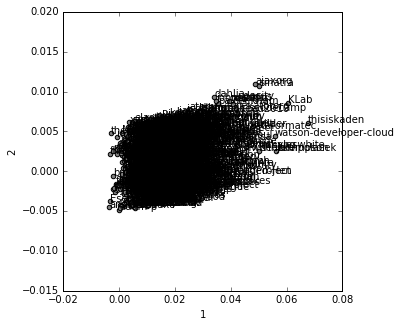

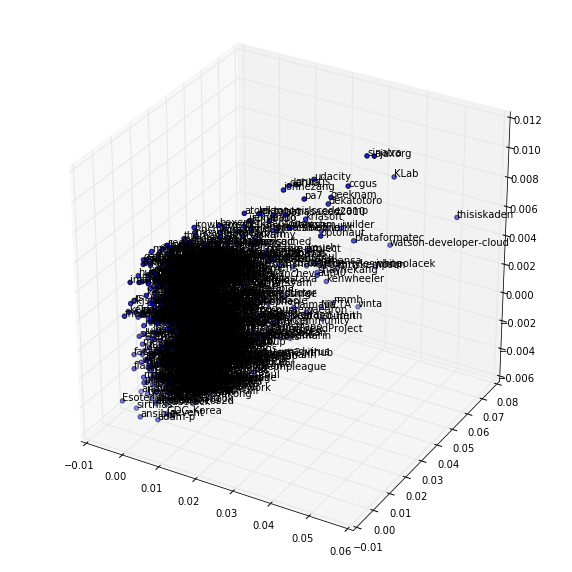

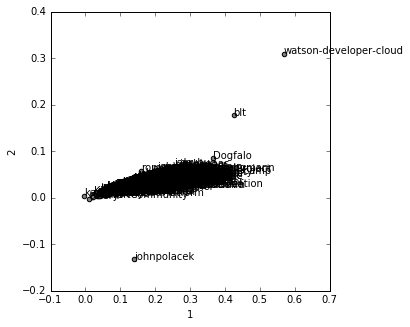

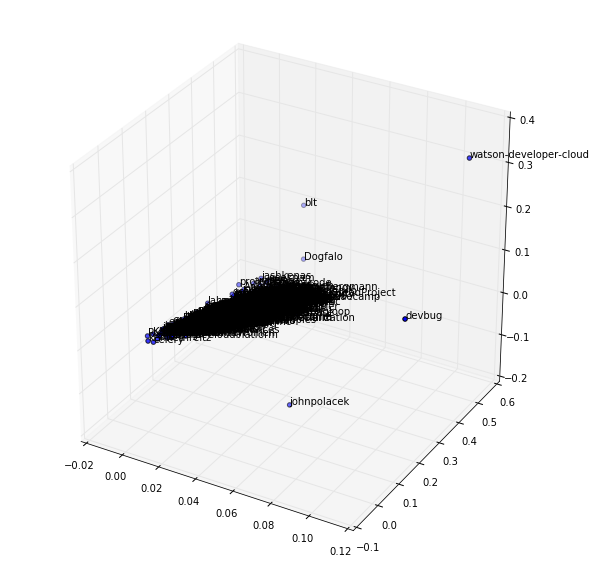

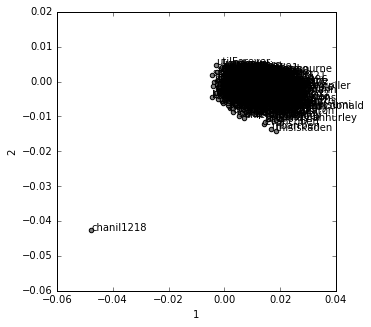

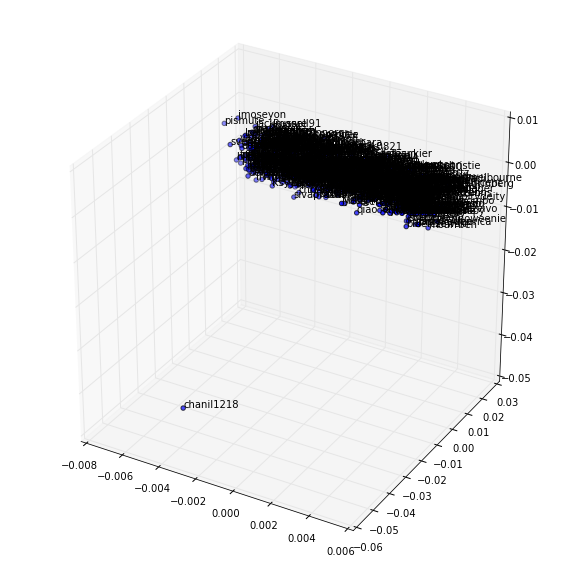

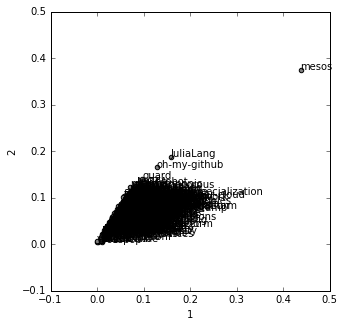

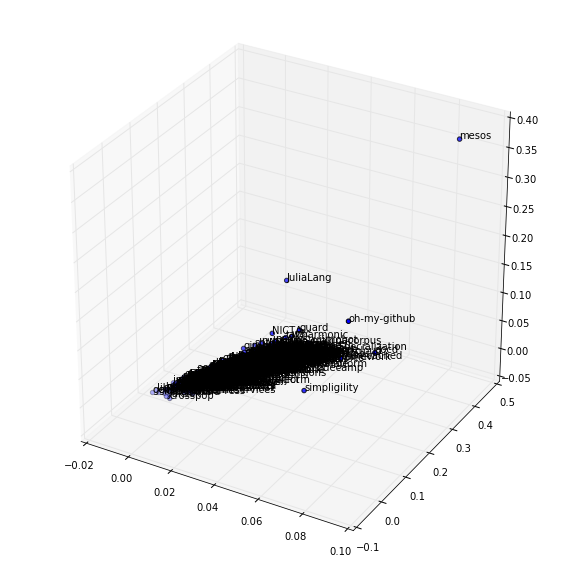

In [24]:
v = pd.DataFrame(model1.syn0, index=model1.vocab)
v2 = pd.DataFrame(model2.syn0, index=model2.vocab)
v3 = pd.DataFrame(model3.syn0, index=model3.vocab)
v4 = pd.DataFrame(model4.syn0, index=model4.vocab)

drawPlot(v, 1, 2)
draw3DPlot(v, 0, 1, 2)

drawPlot(v2, 1, 2)
draw3DPlot(v2, 0, 1, 2)

drawPlot(v3, 1, 2)
draw3DPlot(v3, 0, 1, 2)

drawPlot(v4, 1, 2)
draw3DPlot(v4, 0, 1, 2)


In [25]:
model3.most_similar("javajigi")

[('dittos', 0.7475103139877319),
 ('OscarGodson', 0.7471966743469238),
 ('carpedm20', 0.7418333292007446),
 ('holman', 0.7402359843254089),
 ('omz', 0.7369120121002197),
 ('riseshia', 0.7305034399032593),
 ('aanoaa', 0.73040771484375),
 ('chrisbanes', 0.7299385070800781),
 ('tomekw', 0.7293542623519897),
 ('sametmax', 0.723039448261261)]

In [29]:
merge_df = pd.read_csv("merge_df.csv", encoding="cp949", index_col=0)
user_index_df = matrix[["user"]]

In [267]:
# fork_id_df = fork_df[["ID", "master"]]
# fork_unique_df = fork_id_df.loc[fork_id_df.duplicated() == False]
# merge_df = merge_df.merge(fork_unique_df, left_on="User_name", right_on="ID")
# merge_df = merge_df.drop(["ID"], axis=1)

In [26]:
def recommend_please(ID):
    users = nearest_neighbor_user(ID, 5, cosine_distance)
    users_ID = np.array(users, dtype="int")[:,0]
    sum_users_df = pd.DataFrame(columns=["ID", "similarity"])
    
    for user_ID in users_ID:
        user_name_df = merge_df[merge_df["index_num"] == user_ID]
        master_list = list(user_name_df["master"])

        user_master_df = pd.DataFrame(columns=["ID", "similarity"])
        for master in master_list:
            try:
                similar_df = pd.DataFrame(model3.most_similar(master), columns=["ID", "similarity"])
                user_master_df = pd.concat([user_master_df, similar_df])
            except:
                
                similar_df = pd.DataFrame([[1,0]], columns=["ID", "similarity"])
        sum_users_df = pd.concat([sum_users_df, user_master_df])
    print("{name}님이 본받을만한 리스트입니다".format(name=user_index_df["user"][ID]))
    return sum_users_df.drop_duplicates().sort_values(by="similarity", ascending=False).reset_index(drop=True).head(10)

In [327]:
# matrix[["user"]].loc[[10]]

,user
10,KimHeeKue


In [ ]:
# print("{name}님이 본받을만한 리스트입니다".format(name=user_index_df["user"][ID])

In [32]:
# user_index_df["user"][10]

In [33]:
%%time
recommend_please(10) # 리팩토링 : 아이디로 입력할 수 있도록 할 걸

KimHeeKue님이 본받을만한 리스트입니다
Wall time: 17.2 s


,ID,similarity
0,dahlia,0.908281
1,crsmithdev,0.906672
2,sublee,0.903785
3,vinta,0.902967
4,jaredpar,0.902653
5,junegunn,0.902322
6,lqez,0.901188
7,tj,0.899480
8,rampa069,0.893092
9,kennethreitz,0.889322


In [34]:
%%time
recommend_please(789)

milooy님이 본받을만한 리스트입니다
Wall time: 17.1 s


,ID,similarity
0,mathiasbynens,0.760647
1,yaronn,0.755148
2,sublee,0.754717
3,kennethreitz,0.748063
4,dittos,0.747510
5,OscarGodson,0.747197
6,codegangsta,0.744573
7,muan,0.743119
8,nvbn,0.742288
9,carpedm20,0.741833
